In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('CrudeOil.csv')

In [3]:
data.isnull().any()

Date         True
Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [4]:
data.isnull().sum()

Date         3141
Open         3141
High         3141
Low          3141
Close        3141
Adj Close    3141
Volume       3141
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data_oil=data.reset_index()['Close']
data_oil

0       108.43
1       105.76
2       109.78
3       111.76
4       109.57
         ...  
1883     48.79
1884     48.65
1885     47.93
1886     50.04
1887     52.69
Name: Close, Length: 1888, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [11]:
data_oil

array([[0.90534928],
       [0.88879936],
       [0.91371723],
       ...,
       [0.53034154],
       [0.54342032],
       [0.55984628]])

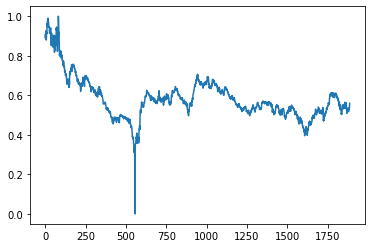

In [12]:
plt.plot(data_oil)

In [13]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [14]:
training_size,test_size

(1227, 661)

In [15]:
train_data.shape

(1227, 1)

In [16]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [17]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [18]:
print(x_train.shape),print(y_train.shape)

(1216, 10)
(1216,)


(None, None)

In [19]:
print(x_test.shape),print(y_test.shape)

(650, 10)
(650,)


(None, None)

In [20]:
x_train

array([[0.90534928, 0.88879936, 0.91371723, ..., 0.8914647 , 0.9191099 ,
        0.91675448],
       [0.88879936, 0.91371723, 0.92599021, ..., 0.9191099 , 0.91675448,
        0.91235356],
       [0.91371723, 0.92599021, 0.91241555, ..., 0.91675448, 0.91235356,
        0.96212732],
       ...,
       [0.52755222, 0.53753177, 0.53796566, ..., 0.52110581, 0.52191161,
        0.52996963],
       [0.53753177, 0.53796566, 0.53486642, ..., 0.52191161, 0.52996963,
        0.5272423 ],
       [0.53796566, 0.53486642, 0.52637451, ..., 0.52996963, 0.5272423 ,
        0.5333168 ]])

In [21]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()

In [24]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))